# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

Признаки:
 * RowNumber — индекс строки в данных
 * CustomerId — уникальный идентификатор клиента
 * Surname — фамилия
 * CreditScore — кредитный рейтинг
 * Geography — страна проживания
 * Gender — пол
 * Age — возраст
 * Tenure — количество недвижимости у клиента
 * Balance — баланс на счёте
 * NumOfProducts — количество продуктов банка, используемых клиентом
 * HasCrCard — наличие кредитной карты
 * IsActiveMember — активность клиента
 * EstimatedSalary — предполагаемая зарплата
 * Целевой признак
 * Exited — факт ухода клиента

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle

# 1. Подготовка данных

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [6]:
df[(df['Tenure'].isnull())].Exited.value_counts()

0    726
1    183
Name: Exited, dtype: int64

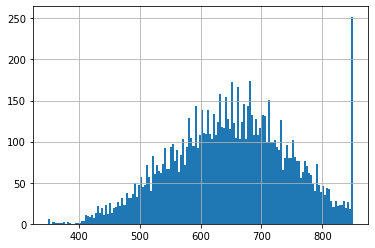

In [7]:
df['CreditScore'].hist(bins=150)

In [8]:
df[df['CreditScore'] == 850]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
38,39,15717426,Armstrong,850,France,Male,36,7.0,0.00,1,1,1,40812.90,0
180,181,15716334,Rozier,850,Spain,Female,45,NaN,122311.21,1,1,1,19482.50,0
200,201,15604482,Chiemezie,850,Spain,Male,30,2.0,141040.01,1,1,1,5978.20,0
223,224,15733247,Stevenson,850,France,Male,33,10.0,0.00,1,1,0,4861.72,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9581,9582,15709256,Glover,850,France,Female,28,9.0,0.00,2,1,1,164864.67,0
9646,9647,15603111,Muir,850,Spain,Male,71,10.0,69608.14,1,1,0,97893.40,1
9688,9689,15730579,Ward,850,France,Male,68,5.0,169445.40,1,1,1,186335.07,0
9931,9932,15647800,Greco,850,France,Female,34,NaN,101266.51,1,1,0,33501.98,0


In [9]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [11]:
df['Age'].sort_values().unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       88, 92])

In [12]:
df['Tenure'].sort_values().unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., nan])

In [13]:
df['Tenure'].isnull().sum()

909

В столбце **Tenure — количество недвижимости у клиента** встречаются пустые значения, необходимо уточнения по данным пропускам. Допустим данные пропуски означают, что у клиента нет недвижимости. Заполнение этих пропусков средним значением или медианой возможно привело бы к переобучению модели. 

Мне наверно стоит научиться удалять такие данные. 

In [14]:
#Заменим пустые значения на 0. 
df['Tenure'] = df['Tenure'].fillna(0)
df['Tenure'] = df['Tenure'].astype(int)

In [15]:
df['Tenure'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

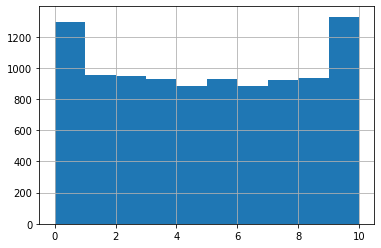

In [16]:
df['Tenure'].hist()

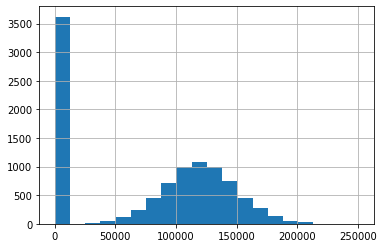

In [17]:
df['Balance'].hist(bins=20)

In [18]:
df['NumOfProducts'].sort_values().unique()

array([1, 2, 3, 4])

In [19]:
df['HasCrCard'].sort_values().unique()

array([0, 1])

In [20]:
df['IsActiveMember'].sort_values().unique()

array([0, 1])

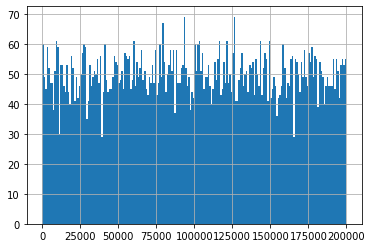

In [21]:
df['EstimatedSalary'].hist(bins=200)

In [22]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Удалим столбцы которые не будут участвовать в списке признаков для обучения модели.

* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия

In [23]:
df = df.drop(['RowNumber','CustomerId','Surname'],axis=1)

<div class="alert alert-block alert-success">
<b>Успех:</b> удалить неинформативные признаки - хорошие решения.
</div>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


---

### Прямое кодирование

Преобразовать категориальные признаки **(Geography — страна проживания, Gender — пол)** в численные поможет техника прямого кодирования, или отображения One-Hot Encoding. Чтобы избежать дамми-ловушку воспользуемся аргументов **drop_first**. 

In [25]:
df_ohe = pd.get_dummies(df,drop_first=True)

In [26]:
df_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


---

### Разбейте данные на выборки

Целевой признак это **факт ухода клиента (Exited)**. Если целевой признак категориальный, то решается задача классификации. У нас бинарной классификации т.к. варианта ответа 2, уйдёт клиент или нет.

Признаки для обудения модели: 
**CreditScore — кредитный рейтинг, Geography — страна проживания, Gender — пол, Age — возраст, Tenure — количество недвижимости у клиента, Balance — баланс на счёте, NumOfProducts — количество продуктов банка, используемых клиентом, HasCrCard — наличие кредитной карты, IsActiveMember — активность клиента, EstimatedSalary — предполагаемая зарплата**.

Разделим данные на 3 выборки: 

 - 60% обучающую
 - 20% валидационную
 - 20% тестовую

На валидационной будем проверять модель на переобучение

На тестовой конечный результат.

In [27]:
target = df_ohe['Exited']
features = df_ohe.drop('Exited',axis=1)

In [28]:
# Разделение на валидационную выборку
features_train, features_valid, target_train, target_valid = train_test_split(features, 
                                                                              target,
                                                                              stratify=target,
                                                                              test_size=0.20, 
                                                                              random_state=12345)

In [29]:
# Разделение на обучающую и тестовую выборки
features_train, features_test, target_train, target_test = train_test_split(features_train, 
                                                                            target_train,
                                                                            stratify=target_train,
                                                                            test_size=0.25, 
                                                                            random_state=12345)

In [30]:
# Проверка доли целевого признака
def chek_stratify(data, namedata):
    print("Доля ушедших клиентов для",namedata,"выборки: {:.2%}".format(data.sum()/len(data)))

In [31]:
chek_stratify(target_train,"обучающей")
chek_stratify(target_valid,"валидационной")
chek_stratify(target_test,"тестовой")

Доля ушедших клиентов для обучающей выборки: 20.38%
Доля ушедших клиентов для валидационной выборки: 20.35%
Доля ушедших клиентов для тестовой выборки: 20.35%


---

### Масштабирование признаков

In [32]:
#Стандартизируем маштаб признаков
#numeric = ['CreditScore','Age','Balance','EstimatedSalary']
#scaler = StandardScaler()
#scaler.fit(features_train[numeric])
#features_train[numeric] = scaler.transform(features_train[numeric])
#features_valid[numeric] = scaler.transform(features_valid[numeric])
#features_test[numeric] = scaler.transform(features_test[numeric])

### Вывод
 * В столбце **Tenure** были заменены пустые значения на 0;
 * Удалены лишние столбцы не участвующие в обучении **RowNumber, CustomerId, Surname**;
 * Преобразовать категориальные признаки **Geography , Gender** в численные;
 * Разделены данные на 3 выборки: обучающую, вариационную и тестовую;
 * Масштабирование признаков ухудшало модель :(
 

# 2. Исследование задачи

In [33]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Клиентов, которые остались **7963** явно больше чем ушедших **2037**, это негативно повлияет на обучение. Попробуем, обучить модели не учитывая дисбаланс данных.

#### Решающее дерево

Применим решающее дерево к нашим данным, оценим качество модели на разных параметрах максимальной глубины. Выберем лучшую модель.

In [34]:
# Решающее дерево
best_model_Tree = None
best_result = 0
best_depth = 0
for depth in range(1,10):
    model = DecisionTreeClassifier(random_state=12345,max_depth=depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)

    if result > best_result:
        best_result = result
        best_depth = depth
        best_model_Tree = model
        
print("f1_score наилучшей модели на валидационной выборке:", best_result, "Максимальная глубина:", best_depth)

probabilities_valid = best_model_Tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print("auc_roc наилучшей модели на валидационной выборке:", auc_roc, "Максимальная глубина:", best_depth)


f1_score наилучшей модели на валидационной выборке: 0.5857142857142857 Максимальная глубина: 8
auc_roc наилучшей модели на валидационной выборке: 0.7994666469242742 Максимальная глубина: 8


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Случайный лес

Применим Случайный лес к нашим данным, оценим качество модели на разных параметрах максимальной глубины и количества деревьев. Выберем лучшую модель.

In [35]:
best_model_Forest = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 110, 10):
    for depth in range (1, 20):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model_Forest = model
            best_result = result
            best_est = est
            best_depth = depth
        
print("f1_score наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

probabilities_valid = best_model_Forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print("auc_roc наилучшей модели на валидационной выборке:", auc_roc, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-sco

f1_score наилучшей модели на валидационной выборке: 0.5837173579109063 Количество деревьев: 70 Максимальная глубина: 15
auc_roc наилучшей модели на валидационной выборке: 0.8588765961647318 Количество деревьев: 70 Максимальная глубина: 15


#### Вывод

Лучшее качество модели показывает Случайный лес (будем его использовать дальше для обучения), но метрика недостаточна для задания. 

# 3. Борьба с дисбалансом

Увеличим обучающую выборку.

Преобразование проходит в несколько этапов:
 * Разделить обучающую выборку на отрицательные и положительные объекты;
 * Скопировать несколько раз положительные объекты;
 * С учётом полученных данных создать новую обучающую выборку;
 * Перемешать данные: идущие друг за другом одинаковые вопросы не помогут обучению.

In [36]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [37]:
target_upsampled.value_counts()

1    4892
0    4777
Name: Exited, dtype: int64

Обучим модель с новыми выборками

In [38]:
best_model_Forest_balanced = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 110, 10):
    for depth in range (1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_upsampled,target_upsampled)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
#        print(result, est, depth)
        if result > best_result:
            best_model_Forest_balanced = model
            best_result = result
            best_est = est
            best_depth = depth
        
print("f1_score наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

probabilities_valid = best_model_Forest_balanced.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print("auc_roc наилучшей модели на валидационной выборке:", auc_roc, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)


f1_score наилучшей модели на валидационной выборке: 0.6387434554973822 Количество деревьев: 100 Максимальная глубина: 9
auc_roc наилучшей модели на валидационной выборке: 0.8688457332525129 Количество деревьев: 100 Максимальная глубина: 9


Обучим модель используя гиперпараметр class_weight='balanced'

In [39]:
best_model_Forest = None
best_result = 0
best_est = 0
best_depth = 0
for est in range(10, 110, 10):
    for depth in range (1, 16):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, class_weight='balanced')
        model.fit(features_upsampled,target_upsampled)
        predictions_valid = model.predict(features_valid)
        result = f1_score(target_valid, predictions_valid)
#        print(result, est, depth)
        if result > best_result:
            best_model_Forest = model
            best_result = result
            best_est = est
            best_depth = depth
        
print("f1_score наилучшей модели на валидационной выборке:", best_result, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)

probabilities_valid = best_model_Forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid,probabilities_one_valid)
print("auc_roc наилучшей модели на валидационной выборке:", auc_roc, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth)


f1_score наилучшей модели на валидационной выборке: 0.6336429308565531 Количество деревьев: 70 Максимальная глубина: 8
auc_roc наилучшей модели на валидационной выборке: 0.8676164608367999 Количество деревьев: 70 Максимальная глубина: 8


#### Вывод 

Увеличив обучающую выборку и обучив модель используя случайный лес мы добились увеличения метрики f1 (0.6387). Также мы попробовали использовать гиперпараметр class_weight, метрика  f1 улучшилась до (0.6336).

# 4. Тестирование модели

In [40]:
predictions_test = best_model_Forest_balanced.predict(features_test)
print('f1_score:',f1_score(target_test, predictions_test))

probabilities_valid = best_model_Forest_balanced.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print('auc_roc:',roc_auc_score(target_test,probabilities_one_valid))

f1_score: 0.6204756980351602
auc_roc: 0.871396820549363


In [41]:
predictions_test = best_model_Forest.predict(features_test)
print('f1_score:',f1_score(target_test, predictions_test))

probabilities_valid = best_model_Forest.predict_proba(features_test)
probabilities_one_valid = probabilities_valid[:, 1]
print('auc_roc:',roc_auc_score(target_test,probabilities_one_valid))

f1_score: 0.621676891615542
auc_roc: 0.870892464112803


##   Вывод


Значение метрики F1 соответствует заявленному минимуму 0.59 в задании, значение auc_roc незначительно отличается от значения при проверке на валидационной выборке.

В результате проекта была создана модель машинного обучения, которая дает достаточный уровень F1. Для этого в датасете были найдены пропуски и устранены. Было решено их заменить на 0 значения, а заполнение этих пропусков средним значением или медианой, возможно, привело бы к переобучению модели. Были удалены столбцы, не участвующие в работе модели. Данные были закодированы для того, чтобы столбцы с категориальными данными стали числовыми. Весь исходный датасет был разделен на обучающую - 60%, валидационную - 20% и тестовую - 20% выборки. Было создано две модели: дерева решений и случайного леса. Создаем модель и обучаем ее на обучающей выборке, далее настраиваем гиперпараметры и проверяем точность на валидационной. Далее было проведено тестирование модели с проведенным балансом классов двумя способами: путём увеличение выборки и настройкой гиперпараментра (class_weight). Следующим шагом было произведен тест на тестовой выборке, было решено использовать модель случайного леса т.к. она давала наилучший результат метрик, чем у других моделей. Результат проверки показал F1 0.62, что соответствует заявленным пороговым значением, также метрика auc_roc показывает 0.87 не на много отличается от валидационной 0.868.